<a href="https://colab.research.google.com/github/bermudezfc/Deep-Learning/blob/main/Bermudez_exercise4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise 4


## Instructions


1. Collect **100-200 images** of the fruit
2. Split the collected images for train, test and validation. Please make sure that there are no duplicate images. Images that are used in train should not appear in test, validation and vice versa.
3. Combine the collected images together with the images of apple, orange and banana. They  are already available in the link below: https://github.com/robitussin/tensorflow_lite_projects/tree/main/images/fruits
4. Create and train a Convolutional Neural Network (CNN).
5. Save the model as **"model.tflite"**
6. Create a folder named **exercise_4** in your **CCDEPLRL_EXERCISES_COM222_ML** repository.
7. Upload the **python notebook (.ipynb)** and the **model (.tflite)** in the exercise_3 folder

Deadline of submission is on **April 22, 2025**

## Model

In [1]:
!wget https://bitbucket.org/ishaanjav/code-and-deploy-custom-tensorflow-lite-model/raw/a4febbfee178324b2083e322cdead7465d6fdf95/fruits.zip

--2025-05-19 06:32:23--  https://bitbucket.org/ishaanjav/code-and-deploy-custom-tensorflow-lite-model/raw/a4febbfee178324b2083e322cdead7465d6fdf95/fruits.zip
Resolving bitbucket.org (bitbucket.org)... 13.200.41.135, 13.200.41.136, 13.200.41.134, ...
Connecting to bitbucket.org (bitbucket.org)|13.200.41.135|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 105946856 (101M) [application/zip]
Saving to: ‘fruits.zip’

fruits.zip          100%[===================>] 101.04M  17.0MB/s    in 6.2s    

2025-05-19 06:32:31 (16.3 MB/s) - ‘fruits.zip’ saved [105946856/105946856]



In [2]:
!unzip fruits.zip

Archive:  fruits.zip
   creating: fruits/
  inflating: __MACOSX/._fruits       
  inflating: fruits/.DS_Store        
  inflating: __MACOSX/fruits/._.DS_Store  
   creating: fruits/test/
   creating: fruits/train/
   creating: fruits/validation/
   creating: fruits/test/apple/
  inflating: fruits/test/.DS_Store   
  inflating: __MACOSX/fruits/test/._.DS_Store  
   creating: fruits/test/banana/
   creating: fruits/test/orange/
   creating: fruits/train/apple/
  inflating: fruits/train/.DS_Store  
  inflating: __MACOSX/fruits/train/._.DS_Store  
   creating: fruits/train/banana/
   creating: fruits/train/orange/
   creating: fruits/validation/apple/
  inflating: fruits/validation/.DS_Store  
  inflating: __MACOSX/fruits/validation/._.DS_Store  
   creating: fruits/validation/banana/
   creating: fruits/validation/orange/
  inflating: fruits/test/apple/Screen Shot 2018-06-08 at 5.27.19 PM.png  
  inflating: __MACOSX/fruits/test/apple/._Screen Shot 2018-06-08 at 5.27.19 PM.png  
  inflatin

Import the libraries

In [3]:
import tensorflow as tf
import matplotlib.pyplot as plt

Hyperparameters: Set the image size and batch size

In [4]:
img_height, img_width = 32, 32
batch_size = 20

Split the images into train, validation and test

In [5]:
train_ds = tf.keras.utils.image_dataset_from_directory(
    "fruits/train",
    image_size = (img_height, img_width),
    batch_size = batch_size
)
val_ds = tf.keras.utils.image_dataset_from_directory(
    "fruits/validation",
    image_size = (img_height, img_width),
    batch_size = batch_size
)
test_ds = tf.keras.utils.image_dataset_from_directory(
    "fruits/test",
    image_size = (img_height, img_width),
    batch_size = batch_size
)

Found 460 files belonging to 3 classes.
Found 66 files belonging to 3 classes.
Found 130 files belonging to 3 classes.


Display sample images from the dataset

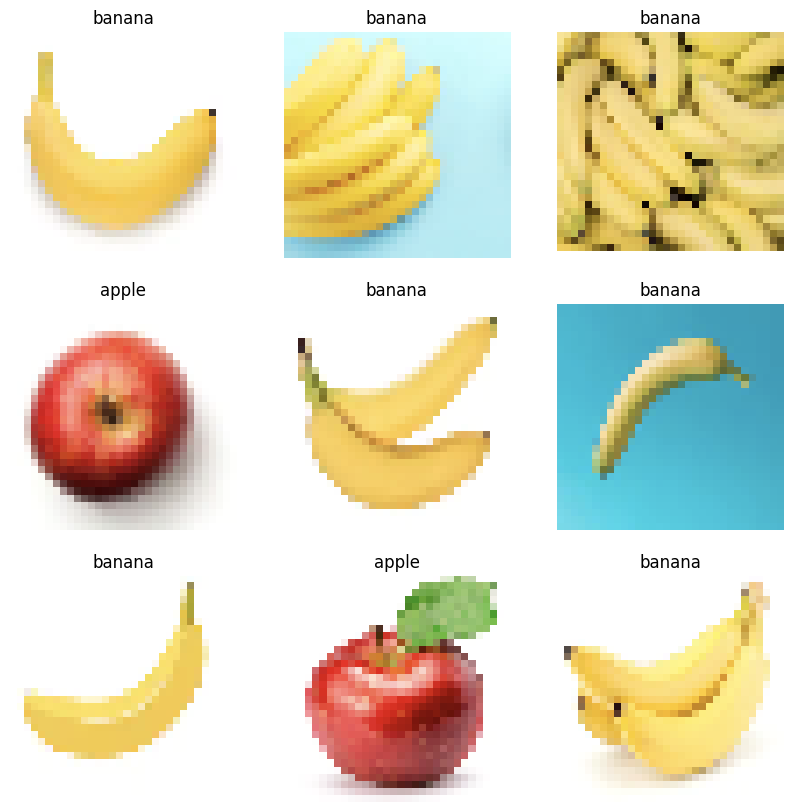

In [6]:
class_names = ["apple", "banana", "orange"]
plt.figure(figsize=(10,10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

Create the Convolutional Neural Network Model (CNN)

In [7]:
model = tf.keras.Sequential(
    [
     tf.keras.layers.Rescaling(1./255),
     tf.keras.layers.Conv2D(32, 3, activation="relu"),
     tf.keras.layers.MaxPooling2D(),
     tf.keras.layers.Conv2D(32, 3, activation="relu"),
     tf.keras.layers.MaxPooling2D(),
     tf.keras.layers.Conv2D(32, 3, activation="relu"),
     tf.keras.layers.MaxPooling2D(),
     tf.keras.layers.Flatten(),
     tf.keras.layers.Dense(128, activation="relu"),
     tf.keras.layers.Dense(3)
    ]
)


Define the optimizer and loss function

In [8]:
model.compile(
    optimizer="adam",
    loss=tf.losses.SparseCategoricalCrossentropy(from_logits = True),
    metrics=['accuracy']
)

Train the model

In [9]:
model.fit(
    train_ds,
    validation_data = val_ds,
    epochs = 10
)

Epoch 1/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 7s 115ms/step - accuracy: 0.4859 - loss: 1.0333 - val_accuracy: 0.8030 - val_loss: 0.6778
Epoch 2/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 65ms/step - accuracy: 0.7820 - loss: 0.5922 - val_accuracy: 0.8788 - val_loss: 0.3601
Epoch 3/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 3s 93ms/step - accuracy: 0.8411 - loss: 0.3942 - val_accuracy: 0.8939 - val_loss: 0.2791
Epoch 4/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 70ms/step - accuracy: 0.9203 - loss: 0.2411 - val_accuracy: 0.8485 - val_loss: 0.3084
Epoch 5/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step - accuracy: 0.9257 - loss: 0.2063 - val_accuracy: 0.9545 - val_loss: 0.1750
Epoch 6/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 3s 70ms/step - accuracy: 0.9216 - loss: 0.1922 - val_accuracy: 0.9091 - val_loss: 0.2568
Epoch 7/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 72ms/step - accuracy: 0.9332 - loss: 0.1902 - val_accuracy: 0.9242 - val_loss: 0.2087
Epoch 8/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 3s 103ms/step - accuracy: 0.9705 - loss: 0.0972 - val_accuracy: 0.9545 -

Test the model

In [10]:
model.evaluate(test_ds)

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 124ms/step - accuracy: 0.9733 - loss: 0.1091


[0.14818063378334045, 0.9615384340286255]

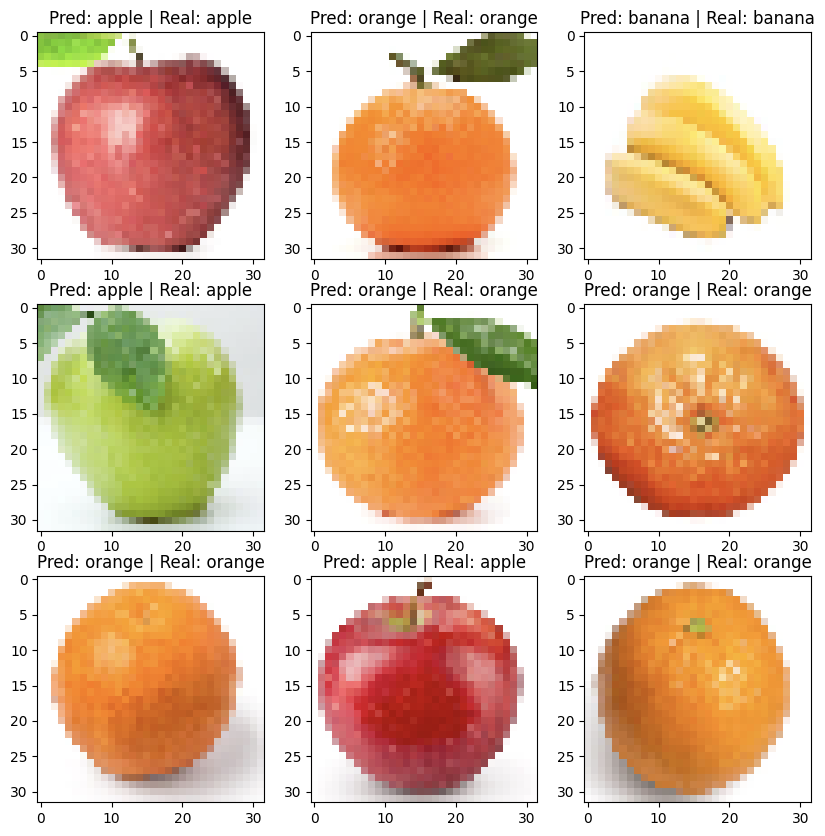

In [11]:
import numpy

plt.figure(figsize=(10,10))
for images, labels in test_ds.take(1):
  classifications = model(images)
  # print(classifications)

  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    index = numpy.argmax(classifications[i])
    plt.title("Pred: " + class_names[index] + " | Real: " + class_names[labels[i]])

Save the model

In [12]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

with open("model.tflite", 'wb') as f:
  f.write(tflite_model)

Saved artifact at '/tmp/tmpmv0_5a9r'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 32, 32, 3), dtype=tf.float32, name='keras_tensor')
Output Type:
  TensorSpec(shape=(None, 3), dtype=tf.float32, name=None)
Captures:
  136492101405968: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136492101403472: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136492101405200: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136492050192464: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136492050191888: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136492050193424: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136492050193808: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136492050194768: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136492050195152: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136492050196112: TensorSpec(shape=(), dtype=tf.resource, name=None)
